## Introdução

No decorrer deste projeto irei aplicar os conteúdos lecionados durante ao longo da unidade curricular Fundamentos de Ciência dos Dados numa base de dados retirada do jogo Football Manager 2021, de modo a conseguir construir, através de machine learning, a melhor equipa de futebol possivel, para os proximos 5 anos. 

## Definição do problema

Football manager é um jogo de simulação desenvolvido pela Sports Interactive, cujo objetivo passa por criar um treinador e comandar uma clube de futebol enquanto treinador principal.

Um treinador principal é responsável por varios aspetos do clube, nomeadamente, criar esquemas taticos, comandar a equipa durante os jogos, dar entrevistas, realizar transferências, entre outros. 

De todas as responsabilidades do treinador a mais complicada é sem duvida a construção da equipa em si. Não só para o presente mas também para o futuro. Uma equipa de futebol precisa de ser equilibrada em varios aspetos. Precisa de lideres, jovens e de jogadores capazes de fazer a diferença. Deste modo, existe um mercado de transferênçias, baseado no mercado real, em que o treinador é capaz de contratar os jogadores que mais se adequam ao sistema tactico e à equipa no geral.

Neste contexto, com este projeto, a ideia passa pela resolução deste problema, através da aquisição da base de dados do jogo, em que estão presentes (quase)todos os jogadores do mundo(profissionais e semi-profissionais) e da consequente previsão do valor de mercado de um jogador baseado na habilidade atual do jogador. Ou seja, este sistema de recomendação seria capaz de recomendar os melhores jogadores para cada posição, dado um determinado limite de dinheiro.

Neste projeto será utilizada uma base de dados retirada de um jogo de Football Manager 2021, que se encontra em Maio de 2021, ou seja, já foram gerados alguns jogadores, que não existem na vida real.


## Aquisição dos dados

Os dados utilizados neste projeto foram retirados do jogo Football Manager 2021 através do software Genie Scout 21g em https://www.fmscout.com/c-fm_genie_scout.html e a base de dados é referente a um jogo com um ano de simulação, ou seja, o jogo começa em Julho de 2020 e os dados retirados são referentes a Maio de 2021.

## Data Wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
ajax_df = pd.read_csv(r"ajax_3.csv",encoding='latin-1')

Remove-se as colunas que não serão utilizadas como, jadeness, condition,hapiness level

In [3]:
ajax_df = ajax_df.dropna()
ajax_df = ajax_df.drop(columns={"Jdns","Con","Happiness Level"})
ajax_df

,Name,Nation,Position,Club,Age,Int Caps,Int Goals,Wage,Value,Sale Value,Best Rating,Best Pot Rating,PoD
0,"Mbappé, Kylian",France,"AM RL, ST",Paris Saint-Germain,22.0,48.0,17.0,"476,150","87,084,440","300,000,000",94.4% (FS),95.3% (FS),100%
1,"Kane, Harry",England / Ireland,AM/F C,Tottenham,28.0,61.0,33.0,"200,000","84,171,600","282,088,380",95.3% (FS),95.3% (FS),100%
2,Neymar,Brazil,"AM LC, F C",Paris Saint-Germain,29.0,115.0,65.0,"858,680","82,065,160","270,284,830",94.0% (FS),96.1% (FS),15%
3,"De Bruyne, Kevin",Belgium / England,"DM, AM RLC",Man City,30.0,90.0,22.0,"236,900","78,798,970","267,164,000",90.6% (W),90.6% (W),100%
4,"Mané, Sadio",Senegal / England,"AM RL, ST",Liverpool,29.0,76.0,24.0,"162,000","80,825,750","266,202,800",91.4% (W),92.1% (W),100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405012,"Zytko, Mateusz",Poland,D C,-,38.0,0.0,0.0,0.0,0.0,0.0,60.8% (CB),60.8% (CB),0%
405013,"Zyumbulev, Evgeni",Bulgaria,D C,Kyustendil,32.0,0.0,0.0,0.0,0.0,0.0,64.1% (CB),64.8% (CB),100%
405014,"Zyuzin, Khalid",Russia,GK,Metallurg Magnitogorsk,16.0,0.0,0.0,0.0,0.0,0.0,39.9% (GK),53.0% (GK),24%
405015,"Zyuzin, Maxim",Russia,DM,-,34.0,0.0,0.0,0.0,0.0,0.0,58.9% (M),58.9% (M),0%


## EDA 

EDA vai ser maioritariamente através de vizualiações de gráficos e tabelas:


- Graficos / Tabela por pais inclui: 

         - Gráficos de Nation x Percentagem de jogadores no mundo, para verificar qual os paises que atualmente têm mais jogadores ativos no mundo
         
         - Gráficos de Nation x Best rating, para verificar quais os paises que atualmente possuem os melhores jogadores a nivel mundial
         
         - Gráficos de Nation x Best potencial rating, para verificar que paises são melhores em termos de desenvolvimento de jogadores    

- Escolha dos melhores 11 por posição

- Graficos / Tabela por posição, para verificar quais a posições mais populares a nivel mundial e fazer comparações com premissas comuns

### Nações

In [4]:
#Separação da segunda nação, já que pretendo somente considerar os paises que os jogadores pretendem representar
#Sendo que esse pais, na dataframe está representado pelo primeiro pais apresentado, como se pode verificar

ajax_df["Nation"] = ajax_df["Nation"].str.split("/").str[0] 
nat_col = ajax_df["Nation"]
nat_dict = dict()

for nation in nat_col:
    
    if nation not in nat_dict:
        
        nat_dict[nation]= nat_col[nat_col == nation].count()
        
all_players = sum(nat_dict.values())


In [5]:
print("Número de Paises: ",len(nat_dict.keys()))
print("Número maximo de jogadores pretencentes a um pais: ",max(nat_dict.values()))
print("Número minimo de jogadores pretencentes a um pais: ",min(nat_dict.values()))

Número de Paises:  445
Número maximo de jogadores pretencentes a um pais:  40172
Número minimo de jogadores pretencentes a um pais:  1


temos 445 paises, alguns deles com 0 jogadores e por isso vamos retirar todos os paises com menos de 11 jogadores já que 11 é o minimo para se jogar um jogo

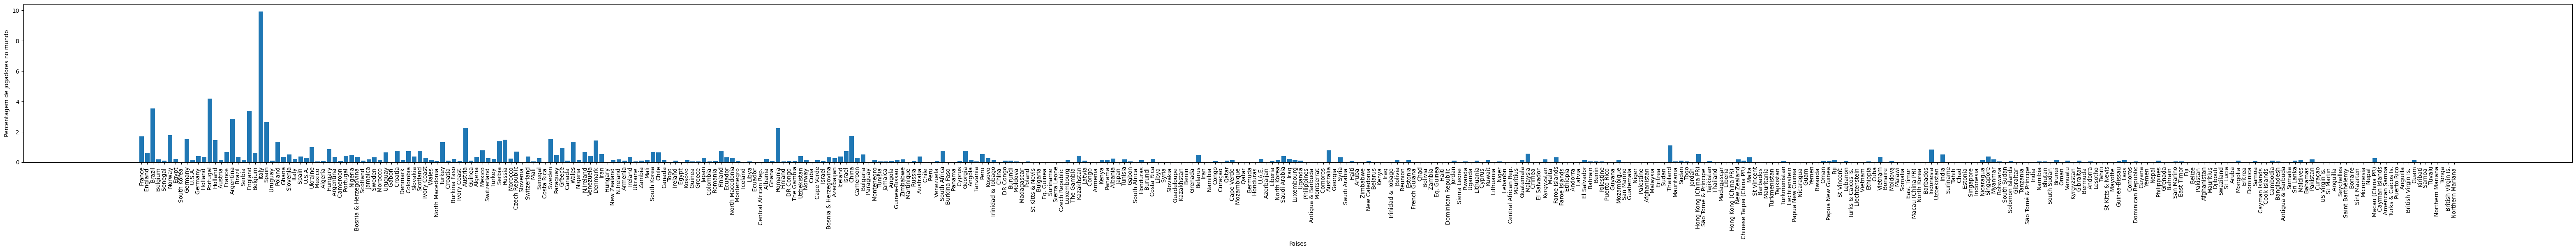

In [6]:
for nation,values in nat_dict.copy().items():
    
    if values < 11:
        
        del nat_dict[nation]
        
for nation,count in nat_dict.items():
    
    value = round( (count / all_players) * 100, 3 )
    nat_dict[nation] = value
    
fig1,ax1 = plt.subplots(figsize=(80,5))
nation =[]
percentage = []
for n,p in nat_dict.items():
    
    nation.append(n)
    percentage.append(p)
   
ax1.bar(nation,percentage)
plt.xlabel("Paises")
plt.ylabel("Percentagem de jogadores no mundo")
plt.xticks(rotation = 90)
plt.show()

In [7]:
sorted_nat_dict = sorted(nat_dict.items(), key=lambda kv: kv[1],reverse=True)
print(pd.DataFrame.from_dict(sorted_nat_dict))


                       0      1
0                  Italy  9.919
1               Portugal  4.184
2                 Brazil  3.542
3                England  3.370
4              Argentina  2.865
..                   ...    ...
403               Yemen   0.003
404             Bahrain   0.003
405      Cayman Islands   0.003
406       US Virgin Is.   0.003
407  British Virgin Is.   0.003

[408 rows x 2 columns]


Conseguimos verificar que grande parte dos jogadores de futebol são maioritariamente pretencentes a paises europeus, sul americanos e africanos. Sendo que existem varios paises cuja representação a nivel mundial é extremamente pequena, no entanto, vamos considerar todos os paises que conseguem ter pelo menos 11 jogadores, sendo que todos aqueles que não atendem a essa condição foram retirados num passo anterior.
Verificamos ainda que o top 5 de paises com mais representação a nivel mundial são, por ordem: Itália, Portugal, Brazil, Inglaterra e Argentina


### Posições

A partir da coluna de posições

In [8]:

pos_col = ajax_df["Position"]
pos_dict = dict()

for position in pos_col:
    
    if position not in pos_dict:
        
        pos_dict[position]= pos_col[pos_col == position].count()

In [9]:
sorted_pos_dict = sorted(pos_dict.items(), key=lambda kv: kv[1],reverse=True)
print(pd.DataFrame.from_dict(sorted_pos_dict))


                    0      1
0                  ST  47488
1                  GK  44753
2                 D C  40668
3                  DM  26584
4                 M C  25166
..                ...    ...
496  D RC, DM, AM/F C      1
497  D C, AM RLC, F C      1
498         WB RL, ST      1
499     D L, DM, AM R      1
500       D R, DM, ST      1

[501 rows x 2 columns]


Na tabela de posições verifica-se que existem jogadores que quando são capazes de jogar mais que uma posição essa posição aparece na coluna da posição e por isso é considerada uma posição diferente. Por exemplo o jogador Bruno Fernandes e o jogador Kevin de Bruyne apesar de jogarem na mesma posição, a sua posição é categorizada de forma diferente. O Kevin De Bruyne como joga todas as posições no meio campo a posição dele é representada como Defensive Midfileder, Attacking Midfilder (Right, Left, Center). Deste modo é necessário fazer a categorização das posições deste tipo de jogadores

Para reduzir o número de posições assume-se que:

 - Qualquer medio, seja defensivo ou centro,esquerdo ou direito é considerado médio, neste caso médio centro (MC)
 
 - Qulquer médio que joga somente posições ofensivas(AM, AMR, AML, etc.) a sua posição será considerada como AM visto que a maior parte destes jogadores pode jogar em qualquer posição do ataque sendo que geralmente mudam a forma como atacam.(Um extremo do lado direito que utilize o pé esquerdo costuma fazer diagonais para centro, enquanto que se jogar no lado oposto costuma arragar mais a linha).
 
 - Qualquer Defesa lateral, seja ele, direito ou esquerdo, ou ala esquerdo ou direito(DL,DR,WBR,WBL, respetivamente), é considerado como defesa lateral, WB.
 
 - Para jogadores que jogam multiplas posições em varias partes do terreno, será considerada sempre a opção defensiva pela natureza unica das posições comparativamente ao resto do campo.(É provável que um médio centro possa jogar do lado direito ou esquerdo ou mesmo a falso 9, mas se este jogador for posto numa posição defensiva o seu rendimento baixará significativamente. Muitas vezes o que acontece é que quando falta jogadores para posições defensivas estes jogadores são muitas vezes quem preenche essas faltas. por exemplo o Joshua Kimmich)
 
 - Jogadores que jogam multiplas posições ofensivas e no meio campo, será considerada a posição do meio campo pela polivalência da mesma
 
Os seguintes filtros serão aplicados, por ordem:

 - Se o jogador joga a defesa centro a sua posição será DC
 - Se o jogador joga a lateral, a sua posição será WB
 - Se o jogador joga a médio centro a sua posição será MC
 - Se o jogador joga a medio atacante, a sua posição será AM



In [10]:

for position,value in sorted_pos_dict:
    
    if "DC" in position or "D" in position:
        
        ajax_df["Position"][ajax_df.Position.str.contains("DC|D")] = "DC"
        
    elif "M C" in position or "M L" in position or "M R" in position:
        
        ajax_df["Position"][ajax_df.Position.str.contains("M C|M L|M R")] = "MC"
        
    elif "WB" in position or "D R" in position or "D L" in position:
        
        ajax_df["Position"][ajax_df.Position.str.contains("WB|D R|D L")] = "WB"
        
    elif "AM" in position:
        
        ajax_df["Position"][ajax_df.Position.str.contains("AM")] = "AM"
    

In [11]:
pos_col = ajax_df["Position"]
pos_dict = dict()

for position in pos_col:
    
    if position not in pos_dict:
        
        pos_dict[position] =  pos_col[pos_col == position].count()  


In [12]:
for position in pos_dict:
    
    pos_dict[position] = ( pos_dict[position] / all_players ) * 100

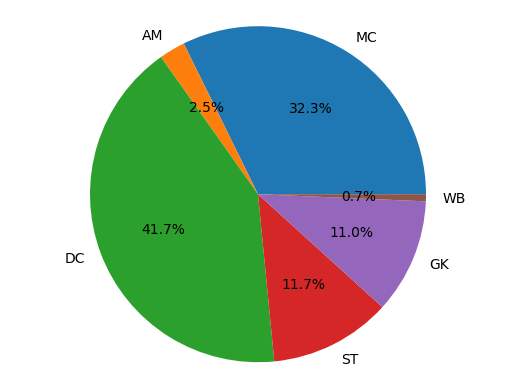

In [13]:
labels = []
sizes = []


for position in pos_dict:
    
    labels.append(position)
    sizes.append(pos_dict[position])
    
plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.axis("equal")
plt.show()

Se as posições forem agrupadas em médios, atacantes e defesas, verifica-se que a area do terreno mais popular é a defensiva seguida do meio campo e da ofensiva sendo que em ultimo o espaço do terreno menos popular é o de guarda-redes.

Após observação é possivel verificar que na coluna de Best Rating está documentada a melhor posição para cada jogador, deste modo um grafico de posições mais preciso seria o seguinte:

In [14]:
ajax_df = pd.read_csv(r"ajax_3.csv",encoding='latin-1')
ajax_df = ajax_df.dropna()
ajax_df = ajax_df.drop(columns={"Jdns","Con","Happiness Level"})
ajax_df

,Name,Nation,Position,Club,Age,Int Caps,Int Goals,Wage,Value,Sale Value,Best Rating,Best Pot Rating,PoD
0,"Mbappé, Kylian",France,"AM RL, ST",Paris Saint-Germain,22.0,48.0,17.0,"476,150","87,084,440","300,000,000",94.4% (FS),95.3% (FS),100%
1,"Kane, Harry",England / Ireland,AM/F C,Tottenham,28.0,61.0,33.0,"200,000","84,171,600","282,088,380",95.3% (FS),95.3% (FS),100%
2,Neymar,Brazil,"AM LC, F C",Paris Saint-Germain,29.0,115.0,65.0,"858,680","82,065,160","270,284,830",94.0% (FS),96.1% (FS),15%
3,"De Bruyne, Kevin",Belgium / England,"DM, AM RLC",Man City,30.0,90.0,22.0,"236,900","78,798,970","267,164,000",90.6% (W),90.6% (W),100%
4,"Mané, Sadio",Senegal / England,"AM RL, ST",Liverpool,29.0,76.0,24.0,"162,000","80,825,750","266,202,800",91.4% (W),92.1% (W),100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405012,"Zytko, Mateusz",Poland,D C,-,38.0,0.0,0.0,0.0,0.0,0.0,60.8% (CB),60.8% (CB),0%
405013,"Zyumbulev, Evgeni",Bulgaria,D C,Kyustendil,32.0,0.0,0.0,0.0,0.0,0.0,64.1% (CB),64.8% (CB),100%
405014,"Zyuzin, Khalid",Russia,GK,Metallurg Magnitogorsk,16.0,0.0,0.0,0.0,0.0,0.0,39.9% (GK),53.0% (GK),24%
405015,"Zyuzin, Maxim",Russia,DM,-,34.0,0.0,0.0,0.0,0.0,0.0,58.9% (M),58.9% (M),0%


In [15]:
ajax_df["Best Rating"] = ajax_df["Best Rating"].str.split("%").str[1]

In [16]:
pos_col = ajax_df["Best Rating"]
pos_dict = dict()

for position in pos_col:
    
    if position not in pos_dict:
        
        pos_dict[position] =  pos_col[pos_col == position].count()  

In [17]:
for position in pos_dict:
    
    pos_dict[position] = ( pos_dict[position] / all_players ) * 100

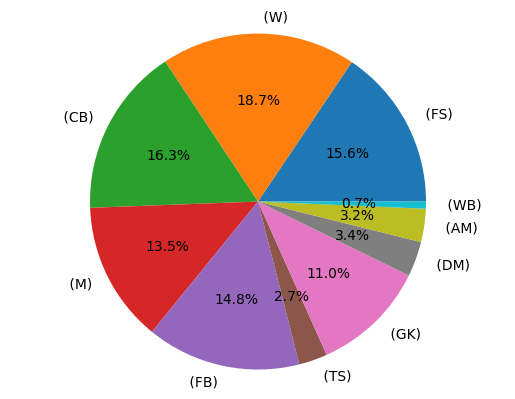

In [18]:
labels = []
sizes = []


for position in pos_dict:
    
    labels.append(position)
    sizes.append(pos_dict[position])
    
plt.pie(sizes, labels=labels,autopct='%1.1f%%')

plt.axis("equal")
plt.show()

Se for tida em consideração somente a melhor posição de cada jogador, verifica-se que a posição mais popular passa a ser a posição lateral em terreno ofensivo, W ou Winger, seguida de defesa centro, CB, Ponta de lança, FS, Medio, M e lateral, FB.
Categorizando posições pela area do terreno, verifica-se:

    - Avançados com 37% de popularidade (FS + TS + W)
    - Médios com 20.1% de popularidade (AM + DM + M)
    - Defesas com 31.8% de popularidade (CB + FB + WB)
    - Guarda-redes com 11% de popularidade

Deste modo e tendo em conta as duas formas de obter este gráfico de posições, ir-se-á considerar o ultimo como a forma correta de proceder à obtenção de posições para casos futuros

### Best Rating x nation

In [19]:
ajax_df = pd.read_csv(r"ajax_3.csv",encoding='latin-1')
ajax_df = ajax_df.dropna()
ajax_df = ajax_df.drop(columns={"Jdns","Con","Happiness Level"})
ajax_df["Nation"] = ajax_df["Nation"].str.split("/").str[0]
ajax_df["Best Rating"] = ajax_df["Best Rating"].str.split("%").str[0] 

ajax_df

,Name,Nation,Position,Club,Age,Int Caps,Int Goals,Wage,Value,Sale Value,Best Rating,Best Pot Rating,PoD
0,"Mbappé, Kylian",France,"AM RL, ST",Paris Saint-Germain,22.0,48.0,17.0,"476,150","87,084,440","300,000,000",94.4,95.3% (FS),100%
1,"Kane, Harry",England,AM/F C,Tottenham,28.0,61.0,33.0,"200,000","84,171,600","282,088,380",95.3,95.3% (FS),100%
2,Neymar,Brazil,"AM LC, F C",Paris Saint-Germain,29.0,115.0,65.0,"858,680","82,065,160","270,284,830",94.0,96.1% (FS),15%
3,"De Bruyne, Kevin",Belgium,"DM, AM RLC",Man City,30.0,90.0,22.0,"236,900","78,798,970","267,164,000",90.6,90.6% (W),100%
4,"Mané, Sadio",Senegal,"AM RL, ST",Liverpool,29.0,76.0,24.0,"162,000","80,825,750","266,202,800",91.4,92.1% (W),100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405012,"Zytko, Mateusz",Poland,D C,-,38.0,0.0,0.0,0.0,0.0,0.0,60.8,60.8% (CB),0%
405013,"Zyumbulev, Evgeni",Bulgaria,D C,Kyustendil,32.0,0.0,0.0,0.0,0.0,0.0,64.1,64.8% (CB),100%
405014,"Zyuzin, Khalid",Russia,GK,Metallurg Magnitogorsk,16.0,0.0,0.0,0.0,0.0,0.0,39.9,53.0% (GK),24%
405015,"Zyuzin, Maxim",Russia,DM,-,34.0,0.0,0.0,0.0,0.0,0.0,58.9,58.9% (M),0%


In [23]:

best_rat_col = ajax_df["Best Rating"]
nat_rat_dict = dict()

for nation in nat_col.unique():
    
    if nation not in nat_rat_dict:
        
        nat_rat_dict[nation]=  best_rat_col[nat_col == nation].astype(float).sum()  

In [24]:
ajax_df["Nation"] = ajax_df["Nation"].str.split("/").str[0]
ajax_df["Nation"] = ajax_df["Nation"].str.strip()
ajax_df["Nation"] = ajax_df["Nation"].str.replace(" ","")

nat_col = ajax_df["Nation"]
nat_dict = dict()

for nation in nat_col.unique():
    
    if nation not in nat_dict:
        
        nat_dict[nation]= nat_col[nat_col == nation].count()
        
all_players = sum(nat_dict.values())



In [25]:
#da erro aqui devido a umas entradas na df
#executando as ultimas duas celulas novamente funciona
for nation in nat_rat_dict:
    
    nat_rat_dict[nation] = nat_rat_dict[nation] / nat_dict[nation]

In [26]:
max(nat_rat_dict, key=nat_rat_dict.get)

'Monaco'

In [27]:
min(nat_rat_dict, key=nat_rat_dict.get)

'Micronesia'

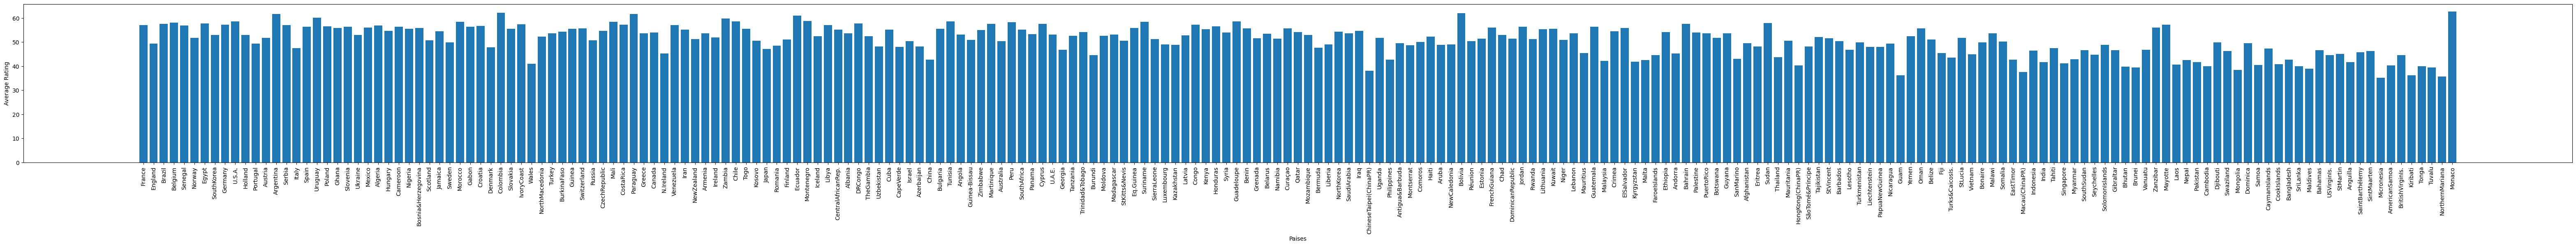

In [28]:
fig1,ax1 = plt.subplots(figsize=(80,5))
nation =[]
average = []
for n,p in nat_rat_dict.items():
    
    nation.append(n)
    average.append(p)
   
ax1.bar(nation,average)
plt.xlabel("Paises")
plt.ylabel("Average Rating")
plt.xticks(rotation = 90)
plt.show()

Deste gráfico não é possivel retirar grande conclusão à parte do facto de que o average best rating varia entre 30 e 60 sendo que na maior parte dos paises onde o futebol é um desporto relativamente popular, está entre 40 e 55.
Será possivel ver melhor quais são as nações com melhores jogadores se selecionarmos uma amostra mais pequena somente com os melhores 10%, por exemplo.

### Best Potencial Rating x nation

In [29]:
ajax_df["Best Pot Rating"] = ajax_df["Best Pot Rating"].str.split("%").str[0]
best_pot_rat_col = ajax_df["Best Pot Rating"]
nat_rat_dict = dict()

for nation in nat_col:
    
    if nation not in nat_rat_dict:
        
        nat_rat_dict[nation]=  best_pot_rat_col[nat_col == nation].astype(float).sum()  
        
for nation in nat_rat_dict:
    
    nat_rat_dict[nation] = nat_rat_dict[nation] / nat_dict[nation]

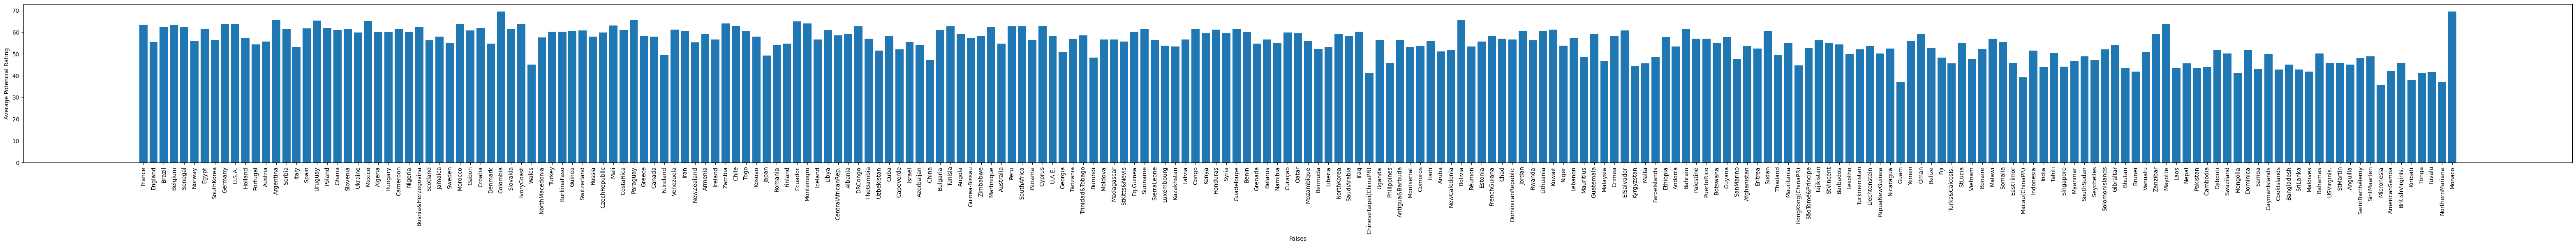

In [30]:
fig1,ax1 = plt.subplots(figsize=(80,5))
nation =[]
average = []
for n,p in nat_rat_dict.items():
    
    nation.append(n)
    average.append(p)
   
ax1.bar(nation,average)
plt.xlabel("Paises")
plt.ylabel("Average Potencial Rating")
plt.xticks(rotation = 90)
plt.show()

In [31]:
best_5 = sorted(nat_rat_dict, key=nat_rat_dict.get, reverse=True)[:5]

Os melhores cinco paises em termos de potencial

In [32]:
best_5

['Colombia', 'Monaco', 'Argentina', 'Paraguay', 'Bolivia']

Novamente não é possivel retirar grandes informações deste gráfico à parte do facto de que os ratings potenciais são claramente superiores aos atuais, como era de esperar. Existe um claro dominio da região sul-americana em termos de jogadores com mais potencial

#### Best 11 players per position

Agora, sabendo a melhor forma de obter as posições dos jogadores, vai-se limpar a dataframe de modo a que todos os valores possam ser utilizados (remover simbolos, etc)

In [33]:
ajax_df = pd.read_csv(r"ajax_3.csv",encoding='latin-1')
ajax_df = ajax_df.dropna()
ajax_df = ajax_df.drop(columns={"Jdns","Con","Happiness Level","Int Caps","Int Goals"})
ajax_df["Nation"] = ajax_df["Nation"].str.split("/").str[0]
ajax_df["Position"] = ajax_df["Best Pot Rating"].str.split("%").str[1]
ajax_df["Best Pot Rating"] = ajax_df["Best Pot Rating"].str.split("%").str[0]
ajax_df["PoD"] = ajax_df["PoD"].str.split("%").str[0]
ajax_df.columns = [c.replace(' ', '_') for c in ajax_df.columns]
ajax_df["Best_Rating"] = ajax_df["Best_Rating"].str.split("%").str[0]
ajax_df["Name"] = ajax_df["Name"].str.replace(" ","")

In [34]:
ajax_df

,Name,Nation,Position,Club,Age,Wage,Value,Sale_Value,Best_Rating,Best_Pot_Rating,PoD
0,"Mbappé,Kylian",France,(FS),Paris Saint-Germain,22.0,"476,150","87,084,440","300,000,000",94.4,95.3,100
1,"Kane,Harry",England,(FS),Tottenham,28.0,"200,000","84,171,600","282,088,380",95.3,95.3,100
2,Neymar,Brazil,(FS),Paris Saint-Germain,29.0,"858,680","82,065,160","270,284,830",94.0,96.1,15
3,"DeBruyne,Kevin",Belgium,(W),Man City,30.0,"236,900","78,798,970","267,164,000",90.6,90.6,100
4,"Mané,Sadio",Senegal,(W),Liverpool,29.0,"162,000","80,825,750","266,202,800",91.4,92.1,100
...,...,...,...,...,...,...,...,...,...,...,...
405012,"Zytko,Mateusz",Poland,(CB),-,38.0,0.0,0.0,0.0,60.8,60.8,0
405013,"Zyumbulev,Evgeni",Bulgaria,(CB),Kyustendil,32.0,0.0,0.0,0.0,64.1,64.8,100
405014,"Zyuzin,Khalid",Russia,(GK),Metallurg Magnitogorsk,16.0,0.0,0.0,0.0,39.9,53.0,24
405015,"Zyuzin,Maxim",Russia,(M),-,34.0,0.0,0.0,0.0,58.9,58.9,0


In [35]:
#Melhores 11 por posição

pos_dict = dict()
pos_col = ajax_df["Position"].unique()

for position in pos_col:
    
    players = ajax_df[ajax_df.Position == position].sort_values("Best_Rating",ascending=False)["Name"].head(11)
    pos_dict[position] = players

In [36]:
#Limpar o dicionario

for position,players in pos_dict.copy().items():
    
    p=[]
    
    for player in players:
        
        del pos_dict[position]
        p.append(player)
        pos_dict[position] = p

In [37]:
pd.DataFrame.from_dict(pos_dict)

,(FS),(W),(CB),(M),(FB),(TS),(GK),(DM),(AM),(WB)
0,"Messi,Lionel","Silva,Bernardo","vanDijk,Virgil","Barella,Nicolò","Kimmich,Joshua","Ibrahimovic,Zlatan","Courtois,Thibaut","Busquets,Sergio","Silva,David","Ayman,Ahmed"
1,"Kane,Harry","Hazard,Eden","deLigt,Matthijs","deJong,Frenkie","Robertson,Andrew","Lukaku,Romelu",Alisson,Casemiro,LuisAlberto,"Hamza,AbdulrazackMohamed"
2,"Félix,João","Mané,Sadio","Laporte,Aymeric","Modric,Luka",Marquinhos,"Deko,Edin","Oblak,Jan","Witsel,Axel","Rodríguez,James","Hernández,Bryan"
3,"Mbappé,Kylian","Sterling,Raheem","Acerbi,Francesco","Kroos,Toni","Alaba,David","Milinkovic-Savic,Sergej","terStegen,Marc-André","Kessié,Franck","Özil,Mesut","Colella,Manuel"
4,"Agüero,Sergio","DeBruyne,Kevin","Ramos,Sergio","Bentancur,Rodrigo","Chilwell,Ben","Giroud,Olivier","Szczesny,Wojciech","Henderson,Jordan","Canales,Sergio","Arikan,Onur"
5,Neymar,"Foden,Phil","Demiral,Merih","Tielemans,Youri",Fabinho,"Zapata,Duván","Neuer,Manuel","Carvalho,William","Eriksen,Christian","Begishev,Ramis"
6,"Lewandowski,Robert",RobertoFirmino,"Hummels,Mats","Kanté,N'Golo","Mendy,Ferland","Llorente,Fernando","Handanovic,Samir","Rice,Declan","Mata,Juan","Jiménez,Jonathan"
7,CristianoRonaldo,"Alexander-Arnold,Trent","deVrij,Stefan","Keïta,Naby",MarioGaspar,MaxiGómez,Ederson,"deRoon,Marten",Pedri,"Lizama,Blas"
8,"Haaland,Erling","Kulusevski,Dejan","Piqué,Gerard","Valverde,Federico","Gayà,José","Mandukic,Mario","Arrizabalaga,Kepa","Ademi,Arijan",PabloHernandez,AhmedAyad
9,"Benzema,Karim","Sancho,Jadon",LuizFelipe,"Brozovic,Marcelo","Müldür,Mert","Belotti,Andrea","DeGea,David","Iborra,Vicente","Payet,Dimitri","Alfaro,Fabricio"


Verifica-se a partir desta tabela que a maioria dos jogadores, tal como esperado, pertencem a clubes que atuam nas principais ligas europeias e que a posição de lateral é a posição em que a maior parte dos jogadores foram gerados pelo jogo(verifica-se a falta de jogadores reais nesta coluna) enquanto que todas as outras são dominadas por jogadores existentes.

Agora, compara-se a tabela anterior com a mesma tabela, mas por Potencial Rating

In [38]:
pos_dict = dict()
pos_col = ajax_df["Position"].unique()

for position in pos_col:
    
    players = ajax_df[ajax_df.Position == position].sort_values("Best_Pot_Rating",ascending=False)["Name"].head(11)
    pos_dict[position] = players

In [39]:
#Limpar o dicionario

for position,players in pos_dict.copy().items():
    
    p=[]
    
    for player in players:
        
        del pos_dict[position]
        p.append(player)
        pos_dict[position] = p

In [40]:
pd.DataFrame.from_dict(pos_dict)

,(FS),(W),(CB),(M),(FB),(TS),(GK),(DM),(AM),(WB)
0,"Messi,Lionel","Silva,Bernardo","vanDijk,Virgil","Pardo,Stefano","Derrien,Stéphan","Ibrahimovic,Zlatan","Tsokos,Evangelos","Busquets,Sergio",Pedri,"Colella,Manuel"
1,"Wolfe,Barry","Hazard,Eden","deLigt,Matthijs","vanKouwen,René","Simmes,Louis","Lukaku,Romelu","Courtois,Thibaut",Casemiro,"Silva,David","BenAhmed,Hamza"
2,Neymar,"González,Sebastián","Barrero,Jorge","Camavinga,Eduardo","Paredes,AlbertoLeon","Deko,Edin",Alisson,"Malpeli,Giorgio","Rodríguez,James","Ancheta,Maximiliano"
3,"Griezmann,Antoine","Kulusevski,Dejan","Rae,Scott","deJong,Frenkie","Lipcsei,Roland","Milinkovic-Savic,Sergej","Donnarumma,Gianluigi","Rice,Declan","Eriksen,Christian","Pasqualetti,Tom"
4,"Kane,Harry","Mané,Sadio","Floiras,Didier","Barella,Nicolò","Garbutt,Carl",MaxiGómez,"Oblak,Jan","Kessié,Franck",Reinier,"Zanfir,Antonio"
5,"Mbappé,Kylian",RobertoFirmino,"Demiral,Merih","Göksel,Cemal","Ruiz,Javier","Cornelius,Andreas","Woller,Yves","Luís,Florentino",Pipi,"Weaver,Kenny"
6,"Félix,João","Foden,Phil",LuizFelipe,"Blé,Ladji","Gvardiol,Joko","Belotti,Andrea","Vandevoordt,Maarten","Majchrzak,Grzegorz",LuisAlberto,"Hamza,AbdulrazackMohamed"
7,"Agüero,Sergio","Ødegaard,Martin","Leclercq,Jean-Jacques","Kroos,Toni","Paiva,João","Zapata,Duván","terStegen,Marc-André","Carvalho,William",Isco,"irdum,Leon"
8,"Lewandowski,Robert","Williams,Nico","Laporte,Aymeric","Cook,Lewis","Dettmann,Jan","Muriqi,Vedat",Domingo,"Vasiu,Alex","Carvalho,João","Gundelach,Moritz"
9,"Kolesnyk,Vadym","Trincão,Francisco","Benkovic,Filip","Villar,Gonzalo","Robertson,Andrew","Giroud,Olivier","Simón,Unai","Witsel,Axel",Hannibal,"Kardaris,Thodoros"


Comparando esta tabela com a anterior consegue-se verificar que, tendo em conta o Best Potencial rating, a tabela inclui bastantes mais jovens, tal como esperado. Ha uma clara dominançia em algumas posições, em que o melhor jogador atual, é também o melhor futuro jogador, sendo incontestavelmente o melhor jogador da posição como é o caso do Lionel Messi ou do Bernardo Silva. Verifica-se ainda varias entradas de jogadores, *Computer generated*, como é o caso do Evangelos Tsokos na posição de guarda redes, como o futuro melhor da posição.

#### 11 Most valuable players per position

Será considerado o value em vez do sale value, já que, o sale value é influenciado pela condição económica do pais e do clube em que o jogador se insere.
De modo a fazer a comparação entre a primeira tabela e esta, para verificar se existe correlação entre os valores de mercado e os ratings dos jogadores

In [41]:
pos_dict = dict()
pos_col = ajax_df["Position"].unique()
ajax_df["Value"] = ajax_df["Value"].str.replace(",","")
ajax_df["Value"] = ajax_df["Value"].fillna(0)
ajax_df["Value"] = ajax_df["Value"].astype(int)

ajax_df["Sale_Value"] = ajax_df["Sale_Value"].str.replace(",","")
ajax_df["Sale_Value"] = ajax_df["Sale_Value"].fillna(0)
ajax_df["Sale_Value"] = ajax_df["Sale_Value"].astype(int)

In [42]:
for position in pos_col:
    
    players = ajax_df[ajax_df.Position == position].sort_values("Value",ascending=False)["Name"].head(11)
    pos_dict[position] = players
    
#Limpar o dicionario

for position,players in pos_dict.copy().items():
    
    p=[]
    
    for player in players:
        
        del pos_dict[position]
        p.append(player)
        pos_dict[position] = p

In [43]:
pd.DataFrame.from_dict(pos_dict)

,(FS),(W),(CB),(M),(FB),(TS),(GK),(DM),(AM),(WB)
0,"Mbappé,Kylian","Mané,Sadio","Laporte,Aymeric","Valverde,Federico","Alaba,David","Lukaku,Romelu",Ederson,Casemiro,LuisAlberto,"Ayman,Ahmed"
1,"Kane,Harry","DeBruyne,Kevin","Dias,Rúben","deJong,Frenkie",Fabinho,"Milinkovic-Savic,Sergej","Courtois,Thibaut","Henderson,Jordan",Isco,"Villa,Adrián"
2,Neymar,"Sterling,Raheem","Varane,Raphaël","Ndombele,Tanguy",Marquinhos,"Jiménez,Raúl",Alisson,Allan,Pedri,"Jiménez,Jonathan"
3,"Son,Heung-Min","Silva,Bernardo","vanDijk,Virgil",Rodri,"Kimmich,Joshua",MaxiGómez,"terStegen,Marc-André","Rodríguez,Guido","Canales,Sergio","Lizama,Blas"
4,"Salah,Mohamed","Havertz,Kai","deLigt,Matthijs","Mount,Mason","Roberto,Sergi","Sørloth,Alexander","Oblak,Jan","Kessié,Franck","Rodríguez,James","Alfaro,Fabricio"
5,"Haaland,Erling",RobertoFirmino,"Süle,Niklas","Goretzka,Leon","Robertson,Andrew","Delort,Andy","DeGea,David","Højbjerg,Pierre-Emile","Quintero,JuanFernando","Komarets,Maxym"
6,"Griezmann,Antoine","Foden,Phil","Torres,Pau","Bentancur,Rodrigo","Gayà,José","Calvert-Lewin,Dominic","Szczesny,Wojciech","Carvalho,William","Eriksen,Christian","Mbong,Joseph"
7,"Werner,Timo","Sané,Leroy","Zouma,Kurt","McKennie,Weston","Aké,Nathan","Haller,Sébastien",Neto,"Llorente,Marcos",OmarAbdulrahman,"Kybyrai,Eskendir"
8,"Kean,Moise","Gnabry,Serge","Kimpembe,Presnel","Partey,Thomas",ÉderMilitão,"Belotti,Andrea","Onana,André","Soucek,Tomas","Malinovskyi,Ruslan","Sarsengaliev,Salamat"
9,GabrielJesus,"Fernandes,Bruno","Demiral,Merih","Tolisso,Corentin","Mendy,Benjamin","Zapata,Duván","Pickford,Jordan","Rice,Declan","Swift,John","Kashken,Dinmukhamed"


A partir desta tabela posso confirmar que nem sempre os jogadores mais valiosos são os melhores. Por exemplo a idade tem uma grande influência no valor de mercado, ou seja, um jogador mais velho, com o mesmo potencial que um jogador mais novo, tem sempre um valor de mercado inferior. Deste modo, nem sempre é benéfico para uma equipa contratar o melhor jogador, se ao fim de alguns anos, o retorno financeiro desse jogador vai ser muito inferior ao atual, mesmo que o retorno desportivo seja alto. 

#### Highest paid players per position

Para verificar a relação entre salários e habilidade do jogador

In [44]:
pos_dict = dict()
pos_col = ajax_df["Position"].unique()
ajax_df["Wage"] = ajax_df["Wage"].str.replace(",","")
ajax_df["Wage"] = ajax_df["Wage"].fillna(0)
ajax_df["Wage"] = ajax_df["Wage"].astype(int)

In [45]:
for position in pos_col:
    
    players = ajax_df[ajax_df.Position == position].sort_values("Wage",ascending=False)["Name"].head(11)
    pos_dict[position] = players
    
#Limpar o dicionario

for position,players in pos_dict.copy().items():
    
    p=[]
    
    for player in players:
        
        del pos_dict[position]
        p.append(player)
        pos_dict[position] = p

In [46]:
pd.DataFrame.from_dict(pos_dict)

,(FS),(W),(CB),(M),(FB),(TS),(GK),(DM),(AM),(WB)
0,CristianoRonaldo,Oscar,"Fellaini,Marouane",Paulinho,Marquinhos,"Deko,Edin","DeGea,David","Busquets,Sergio","Eriksen,Christian","Al-Abbas,Essa"
1,Neymar,"Bale,Gareth","Ramos,Sergio","Kroos,Toni","Hernández,Lucas","Lukaku,Romelu","Neuer,Manuel",Casemiro,Isco,"Ayman,Ahmed"
2,"Messi,Lionel","Hazard,Eden","Bonucci,Leonardo","Kanté,N'Golo","Umtiti,Samuel","Cavani,Edinson","Oblak,Jan","Henderson,Jordan","Pastore,Javier","Al-Sulaiman,Abdulkareem"
3,"Griezmann,Antoine",Talisca,"deLigt,Matthijs","Pjanic,Miralem",AlexSandro,"Ibrahimovic,Zlatan","Courtois,Thibaut","Witsel,Axel","Fàbregas,Cesc","Al-Dakhil,Abdulrahman"
4,"Mbappé,Kylian",Coutinho,"Varane,Raphaël","Verratti,Marco","Chilwell,Ben","Mary,John","Szczesny,Wojciech","Matic,Nemanja","Rodríguez,James","Hazazi,Adel"
5,"Bakambu,Cédric","Sané,Leroy","Koulibaly,Kalidou","Modric,Luka","Kimmich,Joshua","Al-Soma,Omar","Navas,Keylor","Gueye,Idrissa","Özil,Mesut","Al-Maimouni,Manawir"
6,"Lewandowski,Robert","Hamsik,Marek","Maguire,Harry",Thiago,"Roberto,Sergi",Mariano,"Donnarumma,Gianluigi","Strootman,Kevin","Silva,David","Al-Shammari,Bander"
7,"Suárez,Luis","Pogba,Paul","vanDijk,Virgil","Rabiot,Adrien","Meunier,Thomas","Prijovic,Aleksandar",Ederson,"Bakayoko,Tiémoué",LuisAlberto,"Al-Dossari,TurkiHamad"
8,"Arnautovic,Marko",Koke,"Kimpembe,Presnel","Banega,Éver",ÉderMilitão,"Deeney,Troy","Arrizabalaga,Kepa","Nzonzi,Steven","Cazorla,Santi","Traoré,Anas"
9,"Werner,Timo",Marcelo,"Martínez,Iñigo","deJong,Frenkie","Carvajal,Dani","Milinkovic-Savic,Sergej","terStegen,Marc-André","Højbjerg,Pierre-Emile",KooJa-Cheol,"Al-Jabeeri,Hassan"


Olhando para esta tabela, em comparação à anterior consegue-se verificar que salário não estará necessáriamente ligado a habilidade. Por exemplo, o Cristiano Ronaldo, é o jogador mais bem pago na posição FS, no entanto está longe de ser o melhor jogador a nivel de habilidade potencial e atual. Verifica-se ainda que jogadores a atuar na liga chinesa também são pagos bem acima do valor que seriam pagos num liga europeia, por exemplo. 

#### Base de dados final, com tipos atualizados.

In [47]:
ajax_df["Best_Rating"] = ajax_df["Best_Rating"].astype(float)
ajax_df["Best_Pot_Rating"] = ajax_df["Best_Pot_Rating"].astype(float)
ajax_df["PoD"] = ajax_df["PoD"].astype(int)
ajax_df["Name"] = ajax_df["Name"].astype(str)
ajax_df["Position"] = ajax_df["Position"].astype(str)
ajax_df["Nation"] = ajax_df["Nation"].astype(str)


Deste modo a base de dados, após o **EDA** é a seguinte:

In [48]:
ajax_df

,Name,Nation,Position,Club,Age,Wage,Value,Sale_Value,Best_Rating,Best_Pot_Rating,PoD
0,"Mbappé,Kylian",France,(FS),Paris Saint-Germain,22.0,476150,87084440,300000000,94.4,95.3,100
1,"Kane,Harry",England,(FS),Tottenham,28.0,200000,84171600,282088380,95.3,95.3,100
2,Neymar,Brazil,(FS),Paris Saint-Germain,29.0,858680,82065160,270284830,94.0,96.1,15
3,"DeBruyne,Kevin",Belgium,(W),Man City,30.0,236900,78798970,267164000,90.6,90.6,100
4,"Mané,Sadio",Senegal,(W),Liverpool,29.0,162000,80825750,266202800,91.4,92.1,100
...,...,...,...,...,...,...,...,...,...,...,...
405012,"Zytko,Mateusz",Poland,(CB),-,38.0,0,0,0,60.8,60.8,0
405013,"Zyumbulev,Evgeni",Bulgaria,(CB),Kyustendil,32.0,0,0,0,64.1,64.8,100
405014,"Zyuzin,Khalid",Russia,(GK),Metallurg Magnitogorsk,16.0,0,0,0,39.9,53.0,24
405015,"Zyuzin,Maxim",Russia,(M),-,34.0,0,0,0,58.9,58.9,0


In [49]:
ajax_df.dtypes

Name                object
Nation              object
Position            object
Club                object
Age                float64
Wage                 int32
Value                int32
Sale_Value           int32
Best_Rating        float64
Best_Pot_Rating    float64
PoD                  int32
dtype: object

**Categorização dos dados**
Passagem de todos os tipos para int

In [50]:
ajax_df["Age"] = ajax_df["Age"].astype(int)
ajax_df["Best_Rating"] = ajax_df["Best_Rating"].multiply(10)
ajax_df["Best_Rating"] = ajax_df["Best_Rating"].astype(int)
ajax_df["Best_Pot_Rating"] = ajax_df["Best_Pot_Rating"].multiply(10)
ajax_df["Best_Pot_Rating"] = ajax_df["Best_Pot_Rating"].astype(int)
ajax_df["Club"] = ajax_df["Club"].astype("category")
ajax_df["Club"] = ajax_df["Club"].cat.codes
#ajax_df["Best_Rating"] = ajax_df["Best_Rating"].astype("category")
#ajax_df["Best_Pot_Rating"] = ajax_df["Best_Pot_Rating"].astype("category")
#ajax_df["PoD"] = ajax_df["PoD"].astype("category")
#ajax_df["Age"] = ajax_df["Age"].astype("category")
#ajax_df["Value"] = ajax_df["Value"].astype("category")
#ajax_df["Wage"] = ajax_df["Wage"].astype("category")


#ajax_df["Best_Rating"] = ajax_df["Best_Rating"].cat.codes
#ajax_df["Best_Pot_Rating"] = ajax_df["Best_Pot_Rating"].cat.codes
#ajax_df["PoD"] = ajax_df["PoD"].cat.codes
#ajax_df["Age"] = ajax_df["Age"].cat.codes
#ajax_df["Value"] = ajax_df["Value"].cat.codes
#ajax_df["Wage"] = ajax_df["Wage"].cat.codes

In [51]:
ajax_df.dtypes

Name               object
Nation             object
Position           object
Club                int16
Age                 int32
Wage                int32
Value               int32
Sale_Value          int32
Best_Rating         int32
Best_Pot_Rating     int32
PoD                 int32
dtype: object

## Machine Learning

**Heatmap para perceber a relação entre as features**

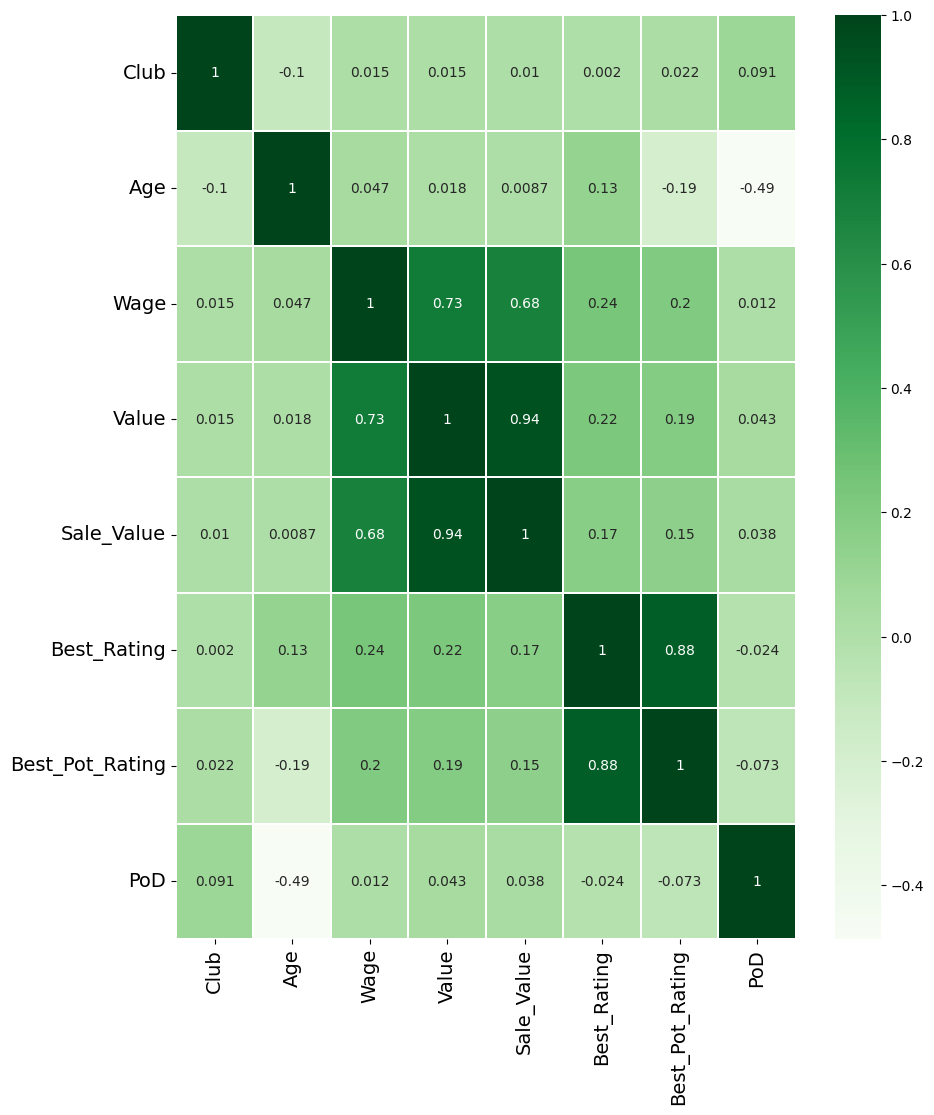

In [52]:
sns.heatmap(ajax_df.corr(),annot=True,cmap='Greens',linewidths=0.2,annot_kws={'size':10},xticklabels=True, yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Verifica-se um clara relação entre valor de mercado, idade, e a habilidade do jogador. O potencial de desenvolvimento do jogador não parece ter grande influência no valor do jogador. De notar que este valor é bastante influenciado pelo clube que o jogador representa bem como equipa tecnica e mentores. Sendo que pode variar durante a carreira do jogador. Todos os outros valores são basicamente constantes durante toda a carreira do jogador(idade, habilidade atual e valor, variam durante a carreira obviamente). Verifica-se ainda uma clara relação entre o valor de mercado do jogador e o salário que este aufere.

In [53]:
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import utils

Vou tentar prever o valor de um jogador de modo a conseguir, através das habilidades atuais e potenciais dos jogadores e das outras features depictadas anteriormente.

Retirada amostra dos dados, 20000 dados retirados aleatoriamente

In [54]:
ajax_df_new = ajax_df.sample(frac=1)[:20000]
ajax_df_new

,Name,Nation,Position,Club,Age,Wage,Value,Sale_Value,Best_Rating,Best_Pot_Rating,PoD
100329,"Bulaya,Felix",Zambia,(W),17128,23,100,8040,3370,620,681,49
311059,"Lazar,Florin",Romania,(FB),16116,24,0,0,0,528,583,42
30626,"Yermakov,Vitaliy",Ukraine,(CB),6129,29,100,123880,51020,631,672,14
38630,"Dugourd,Dylan",Switzerland,(W),5082,25,1290,72760,31940,651,671,100
245689,"Castillo,GaryEmiliano",Uruguay,(FS),22482,37,0,0,0,579,579,0
...,...,...,...,...,...,...,...,...,...,...,...
54858,"Laidani,Abdullah",Switzerland,(GK),23969,18,210,8160,16280,603,661,72
97495,"Franin,Marco",Switzerland,(CB),8938,29,650,9320,3710,563,572,100
121201,"Kolbuntsov,Dmitrii",Kazakhstan,(GK),24122,25,1140,24580,1580,611,655,41
158374,"Zappalà,Tommaso",Italy,(FB),12763,15,0,280,500,427,518,31


Y ->Value X -> Age, Wage, Best_Rating, Best_Pot_Rating, PoD

Devidi o dataset em 70/30, 70 de teste e 30 de treino

In [55]:
X = ajax_df_new.drop(["Value","Name","Nation","Position"], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = ajax_df_new["Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**SVM** (Support Vectors Machines)

In [ ]:
svc_model = SVC(gamma="auto", kernel="rbf",C=1)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
matrix = plot_confusion_matrix(dt,X_test,y_test,cmap="Blues")

**K-Nearest Neighbours**

In [ ]:
knn=KNeighborsClassifier() 
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_pred,y_test))

**Decision Trees**

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_pred,y_test))

**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_pred,y_test))

**Random Forest**

In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_pred,y_test))

**Naive Bayes**

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_pred,y_test))

**Neural network - MLP Classifier**

In [ ]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)
print("Score: ", clf.score(X_test, y_test))

Com uma accuracy de cerca de 46% verifico que nenhum dos modelos é capaz de prever, com alguma regularidade o valor do jogador. Assumo que, isto se deva, para além das escolhas feitas na parte deste projeto referente ao EDA(retirou-se colunas como o clube que representa, jadeness, hapiness, jogos pelas seleções, etc.), devido aos varios valores, não presentes na base de dados, como liga onde o jogador atua, lesões, o facto de o jogador estar listado como transferivel ou não, performances da epoca transata, etc. Estes valores impactam também o valor de mercado e por isso é dificil para qualquer modelo prever valores de mercado sem todos os valores necessários para tal. 
Dito isto e considerando a falta destes valores, concluo que estes valores (cerca de 46%), apesar de espaço para melhorar, são aceitaveis neste contexto.

Agora vou tentar melhorar estes valores a partir do grid search

### Grid Search

SVM

In [ ]:
param_grid = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001],"kernel": ["rbf"]} 


grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=2)

grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

KNN

In [ ]:

param_grid = dict(n_neighbors =  list(range(1,31)), weights = ["uniform", "distance"], leaf_size = [1,3,5], algorithm = ["auto", "kd_tree"] )


knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 2, verbose=3, n_jobs=-1)
grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Decision Trees

In [ ]:
param_grid={"min_samples_split" : range(10,500,20),"max_depth": range(1,20,2), "criterion":["gini", "entropy"],"max_depth": [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]}

dt = DecisionTreeClassifier()

grid = GridSearchCV(dt, param_grid, cv = 2, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Logistic Regression

In [ ]:
param_grid = {"C":np.logspace(-3,3,10), "penalty":["l1","l2"]}

lr = LogisticRegression()

grid = GridSearchCV(lr, param_grid, cv = 2, verbose=3, n_jobs=-1)



grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Random Forest

In [ ]:
param_grid = { "n_estimators": [100, 200, 500,],"max_features": ["auto", "sqrt", "log2"],"max_depth" : [2,4,5,6,7,8],"criterion" :["gini", "entropy"]
}
rf=RandomForestClassifier(n_estimators=100)

grid = GridSearchCV(rf, param_grid, cv = 2, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Naive Bayes

In [ ]:
param_grid = {"var_smoothing": np.logspace(0,-9, num=100)}

gnb=GaussianNB()

grid = grid = GridSearchCV(gnb, param_grid, cv = 2, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

MLP Classifier

In [ ]:
param_grid = {"hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],"activation": ["tanh", "relu"],"solver": ["sgd", "adam"],"alpha": [0.0001, 0.05],"learning_rate": ['constant','adaptive'],}

clf = MLPClassifier(random_state=1)

grid = GridSearchCV(clf, param_grid, cv = 2, verbose=3, n_jobs=-1)

grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

Verifica-se que em alguns modelos se melhora o valor do passo anterior mas não significativamente.